## Predicting Flight Ticket Price

The goal of this project is to provide a gentle introduction into the architecture of Neural Networks and Deep Learning 

Dataset information

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket


In [1]:
import pandas as pd
import numpy

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot') 

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Preprocessing 

In [4]:
data = pd.read_excel('Data_Train.xlsx')

In [5]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
data.shape

(10683, 11)

In [8]:
## check for percentage of null values

data.isnull().sum()/len(data)

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.000094
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.000094
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [9]:
##  Drop null values

data.dropna(axis= 0, inplace = True)
print('Null values dropped successfully')

Null values dropped successfully


In [10]:
data.shape

(10682, 11)

### Feature Engineering

In [11]:
## create new dataframe to hold new features

train = pd.DataFrame()

In [12]:
## Check for unique airlines

data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [13]:
## Store dummy variables in new dataframe

train = pd.get_dummies(data.Airline)

In [14]:
train.head(10)

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0


Get day, month and year features from Date_of_Journey column

In [15]:
## Split date,day and month

train['Day'] = data['Date_of_Journey'].str.split('/').str[0]
train['Month'] = data['Date_of_Journey'].str.split('/').str[1]
train['Year'] = data['Date_of_Journey'].str.split('/').str[2]

In [16]:
train.columns

Index(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Day', 'Month', 'Year'],
      dtype='object')

In [17]:
train['Year'].unique()

array(['2019'], dtype=object)

In [18]:
## The data was taken in 2019 and as such there is only one value. It would thus be dropped 

train.drop(labels = 'Year',inplace = True, axis = 1)
print('Year column dropped successfully')

Year column dropped successfully


In [19]:
## convert data types to integer

train['Day'] = train['Day'].astype(int)
train['Month'] = train['Month'].astype(int)

In [20]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [21]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [22]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [23]:
data.groupby(data['Source'])['Price'].mean().sort_values(ascending=False)

Source
Delhi       10540.113536
Kolkata      9158.389411
Banglore     8017.464269
Mumbai       5059.708752
Chennai      4789.892388
Name: Price, dtype: float64

In [24]:
## Encode source column using the value counts and average price 
train['Source'] = data['Source'].map({'Delhi': 5,
                                     'Kolkata': 4,
                                     'Banglore' : 3,
                                     'Mumbai' : 2,
                                     'Chennai' : 1})

Destination Column

In [25]:
data.groupby(data['Destination'])['Price'].mean().sort_values(ascending=False)

Destination
New Delhi    11917.716738
Cochin       10540.113536
Banglore      9158.389411
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata       4789.892388
Name: Price, dtype: float64

In [26]:
train['Destination'] =data['Destination'].map({'New Delhi': 6,
                                              'Cochin' : 5,
                                              'Banglore' : 4,
                                              'Delhi' : 3,
                                              'Hyderabad': 2,
                                              'Kolkata': 1})

In [27]:
train.head(5)

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Day,Month,Source,Destination
0,0,0,0,1,0,0,0,0,0,0,0,0,24,3,3,6
1,0,1,0,0,0,0,0,0,0,0,0,0,1,5,4,4
2,0,0,0,0,1,0,0,0,0,0,0,0,9,6,5,5
3,0,0,0,1,0,0,0,0,0,0,0,0,12,5,4,4
4,0,0,0,1,0,0,0,0,0,0,0,0,1,3,3,6


In [28]:
data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

Route columns contain too many categories and might have a negative effect on the predictive model. The stops column should however be able to properly account for it higher stops longer routes

Dept_Time

In [29]:
## Break Departure time into Hour of departure and minute of departure

train['Hour_of_Dept'] = data['Dep_Time'].str.split(':').str[0]
train['Minute_of_Dept']= data['Dep_Time'].str.split(':').str[1]

In [30]:
## convert new variables to integer

train['Hour_of_Dept'] = train['Hour_of_Dept'].astype(int)
train['Minute_of_Dept'] = train['Minute_of_Dept'].astype(int)

Arrival time column would not be include as the Duration columns should already contain enough imformation to cover the two columns and it should also reduce multicollinearity

In [31]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [32]:
## Engineer feature that holds the duration covered in minutes

train['time_in_hours'] = data['Duration'].str.split('h').str[0]
train['minutes_left'] = data['Duration'].str.split('h').str[1]

In [33]:
## remove characters from newly engineered columns column

train['minutes_left'] = train['minutes_left'].str.replace(r'\D', '')
train['time_in_hours'] = train['time_in_hours'].str.replace(r'\D', '')

In [34]:
## replace empty field in minutes_left column

train['minutes_left'] =train['minutes_left'].replace(r'^\s*$',0, regex= True)
train['minutes_left'].fillna(0, inplace = True)

train['time_in_hours'] = train['time_in_hours'].replace(r'^\s*$',0, regex= True)
train['time_in_hours'].fillna(0, inplace = True)

In [35]:
train['time_in_hours'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [36]:
## convert to integer

train['time_in_hours'] = train['time_in_hours'].astype(int)
train['minutes_left'] = train['minutes_left'].astype(int)

In [37]:
train['Duration_in_Minutes'] = train['time_in_hours'] * 60 + train['minutes_left']

In [38]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [39]:
## Drop time_in_hours and minutes_left features

train.drop(labels=['time_in_hours','minutes_left'], inplace=True,axis = 1)

Total_Stops

In [40]:
data.groupby(['Total_Stops'])['Price'].mean().sort_values(ascending=False)

Total_Stops
4 stops     17686.000000
3 stops     13112.000000
2 stops     12715.807895
1 stop      10594.123556
non-stop     5024.900315
Name: Price, dtype: float64

In [41]:
train['Stops'] = data['Total_Stops'].map({'4 stops' : 5,
                                         '3 stops': 4,
                                         '2 stops': 3,
                                         '1 stop': 2,
                                         'non-stop': 1})

Additional_Info

In [42]:
data.groupby(['Additional_Info'])['Price'].mean().sort_values(ascending=False)

Additional_Info
Business class                  56811.250000
1 Short layover                 26743.000000
2 Long layover                  26480.000000
1 Long layover                  22109.631579
Change airports                 16800.714286
Red-eye flight                  10873.000000
In-flight meal not included      9471.834511
No info                          9141.519295
No Info                          8044.666667
No check-in baggage included     3645.156250
Name: Price, dtype: float64

In [43]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [44]:
train['Additional_Info'] = data['Additional_Info'].map({'Business class': 3,
                                                       '1 Short layover' : 2,
                                                       '2 Long layover' : 2,
                                                       '1 Long layover': 2,
                                                       'Change airports': 1,
                                                       'Red-eye flight': 1,
                                                       'In-flight meal not included': 1,
                                                       'No info': 1,
                                                       'No Info' : 1,
                                                       'No check-in baggage included': 1})

In [45]:
train['Additional_Info'].value_counts()

1    10657
2       21
3        4
Name: Additional_Info, dtype: int64

In [46]:
train['Additional_Info'] = train['Additional_Info'].astype(int)

Price

In [47]:
train['Price'] = data['Price']

### Exploratory Data Analysis

In [48]:
correlations = train.corr()

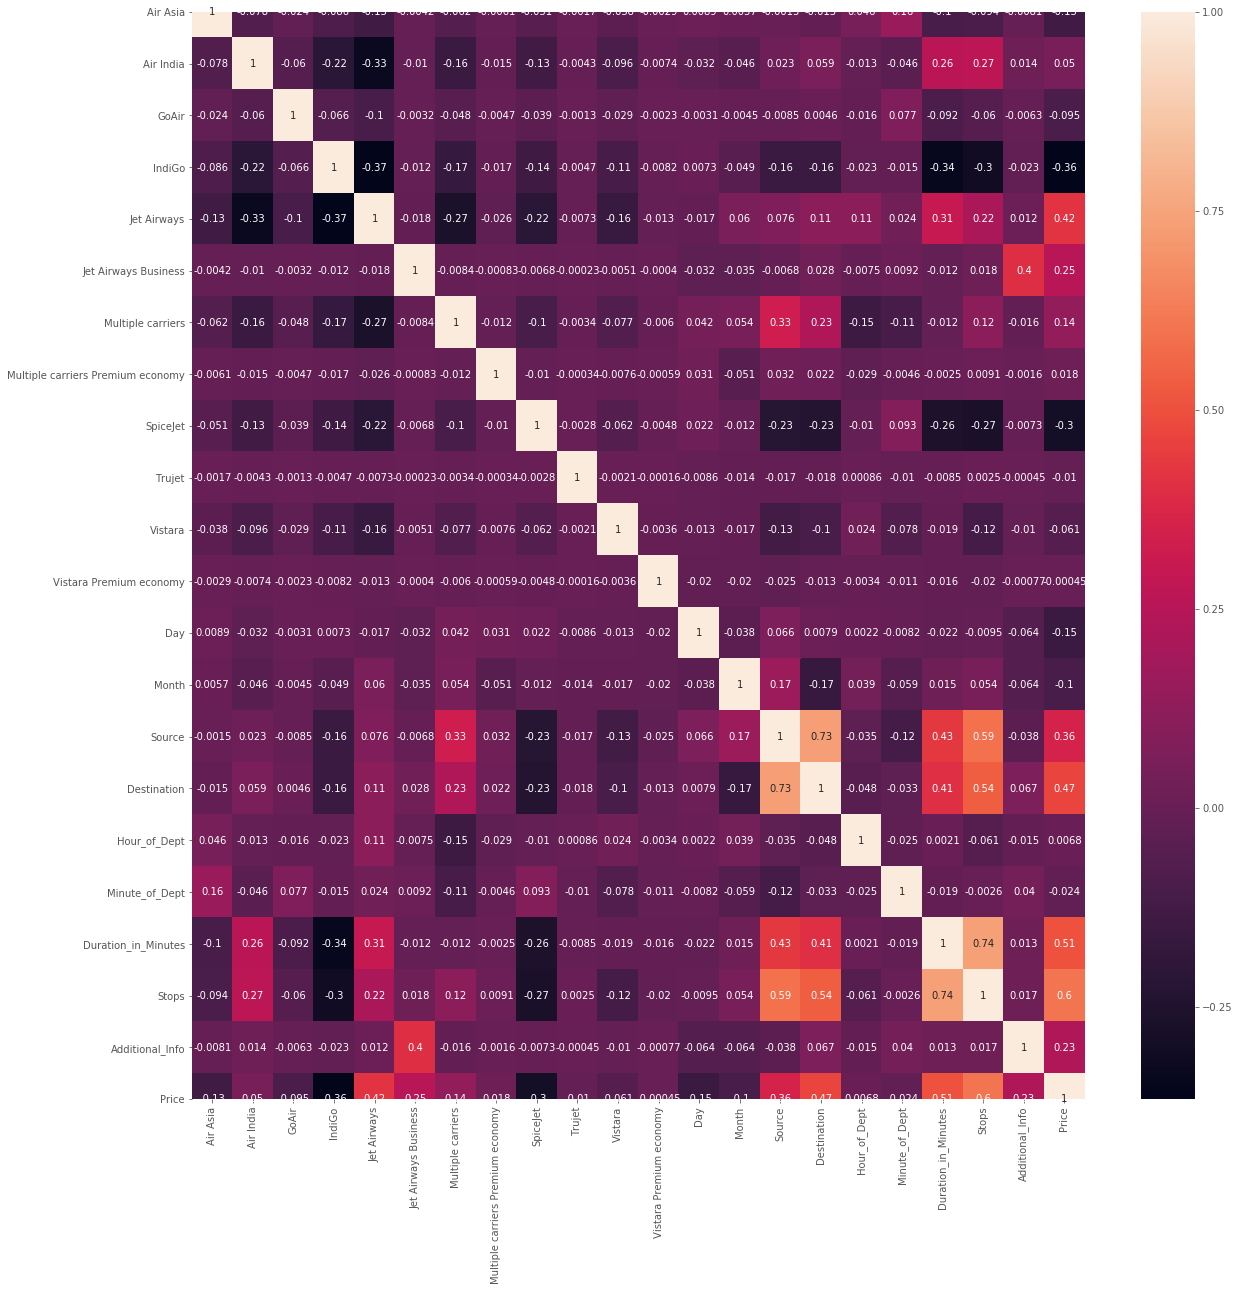

In [49]:
plt.figure(figsize=(20.0,20.0))
sns.heatmap(data = correlations, annot=True)
plt.show()

From the heatmap, it is evident that there are variables that are highly correlated with the target variable('price')

### Feature Selection

In [50]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [51]:
x = train['Price'].values.reshape(-1,1)
y = train.drop(labels='Price', axis = 1)

In [52]:
y.shape

(10682, 21)

In [53]:
##apply selectkbest to get top ten best features
best_features = SelectKBest(score_func=chi2,k=10)

In [54]:
fit= best_features.fit(y,x)

In [55]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(y.columns)

In [56]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [57]:
print(featureScores.nlargest(10,'Score'))

                                Specs         Score
18                Duration_in_Minutes  3.344178e+06
17                     Minute_of_Dept  6.839028e+04
12                                Day  2.259886e+04
16                       Hour_of_Dept  1.105831e+04
9                              Trujet  1.068100e+04
11            Vistara Premium economy  1.067900e+04
5                Jet Airways Business  1.067600e+04
7   Multiple carriers Premium economy  1.066900e+04
10                            Vistara  1.006586e+04
0                            Air Asia  9.892909e+03


In [58]:
## save engineered features to csv

In [62]:
new_df =train.to_csv(r'C:\Users\Win10\Desktop\Flight Price Predictions\new_df.csv')